   **PLOTS AND VERIFICATIONS IN _"PARTICLE IN A BOX"_ PROBLEM** 

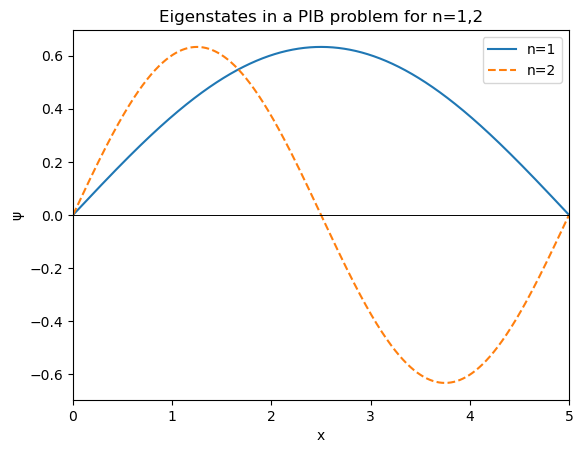

In [2]:
# Wavefunction plot for PIB for n=1 and n=2

import matplotlib.pyplot as plt
import numpy as np

L = 5
for n in [1, 2]:
    x = np.linspace(0, L, 2000)
    y = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
    plt.plot(x, y, '-' if n == 1 else '--', label='n=1' if n == 1 else 'n=2')

plt.axhline(y=0, color='black', linewidth=0.7)  # Adding the x-axis line
plt.xlim(0, max(x))
plt.xlabel('x')
plt.ylabel('\u03C8')
plt.title('Eigenstates in a PIB problem for n=1,2')
plt.legend()
plt.show()

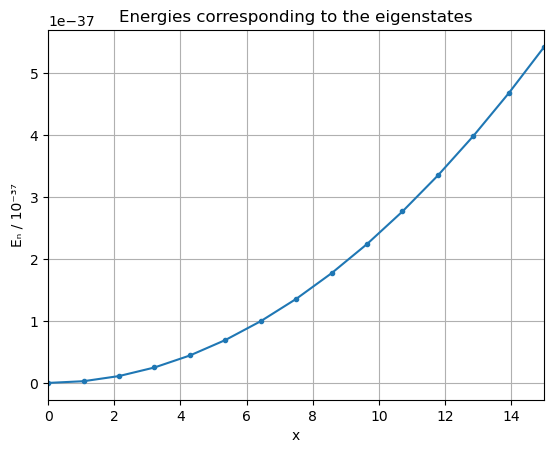

In [3]:
# Eigenenergies of 1D-PIB UPTO n=15

import matplotlib.pyplot as plt
import numpy as np
L=5
h=1.054571*10**(-34)
m=9.1*10**(-31)
n = np.linspace(0,15,15)
E = ((h*np.pi*n/L)**2)/(2*m)
plt.plot(n, E,'.-')
plt.xlim(0, max(n))
plt.xlabel('x')
plt.ylabel('Eₙ / 10\u207b\u00b3\u2077')
plt.title('Energies corresponding to the eigenstates')
plt.grid(True)
plt.show()


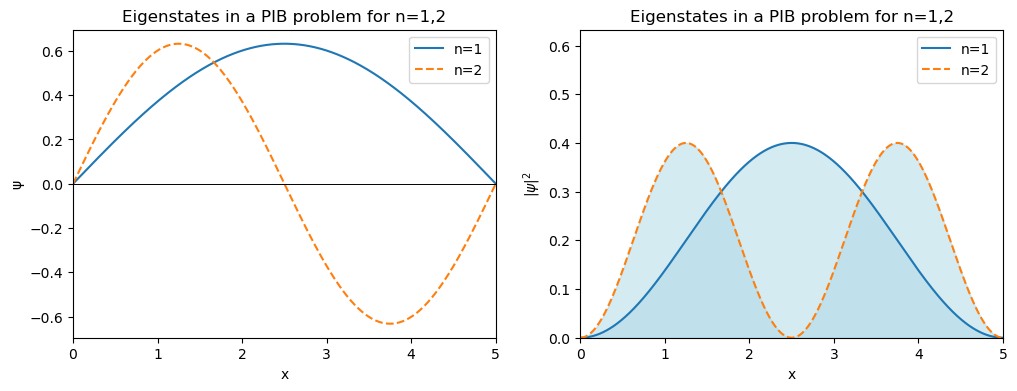

In [4]:
#Wavefunction plot and probability density function of 1D PIB in a single frame

fig, axes = plt.subplots(1,2,figsize=(12,4))
#FOR WAVEFUNCTION PLOT
ax1=axes[0]
for n in [1, 2]:
    x = np.linspace(0, L, 2000)
    y = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
    ax1.plot(x, y, '-' if n == 1 else '--', label='n=1' if n == 1 else 'n=2')
    #ax1.fill_between(x, y, color='lightblue', alpha=0.5)
ax1.axhline(y=0, color='black', linewidth=0.7)  # Adding the x-axis line
ax1.set_xlim(0, max(x))
ax1.set_xlabel('x')
ax1.set_ylabel('\u03C8')
ax1.set_title('Eigenstates in a PIB problem for n=1,2')
ax1.legend()

#FOR PROBABILITY DENSITY PLOT
ax2=axes[1]
for n in [1, 2]:
    y = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
    ax2.plot(x, y**2, '-' if n == 1 else '--', label='n=1' if n == 1 else 'n=2')
    ax2.fill_between(x, y**2, color='lightblue', alpha=0.5)
#ax2.axhline(y=0, color='black', linewidth=0.7)  # Adding the x-axis line
ax2.set_ylim(0, max(y))
ax2.set_xlim(0, max(x))
ax2.set_xlabel('x')
ax2.set_ylabel(r'$|\psi|^2$')
ax2.set_title('Eigenstates in a PIB problem for n=1,2')
ax2.legend()

#PLOT PRINTING
plt.show()



In [5]:
#VERIFYING ORTHOGONALITY OF THE EIGENSTATES
from scipy.integrate import quad
n=1
integrand = lambda x:  (np.sqrt(2/L) * np.sin(n * np.pi * x / L))*(np.conjugate(np.sqrt(2/L) * np.sin(n * np.pi * x / L)))
integral, integral_error= quad(integrand, 0, L)
print('FOR n=1 and n=1 eigenstates,\nIntegral=%f \nIntegral error=%f\n'%(integral,integral_error))
integrand = lambda x:  (np.sqrt(2/L) * np.sin(n * np.pi * x / L))*(np.conjugate(np.sqrt(2/L) * np.sin((n+1) * np.pi * x / L)))
integral, integral_error= quad(integrand, 0, L)
print('FOR n=1 and n=2 eigenstates,\nIntegral=%f \nIntegral error=%f'%(integral,integral_error))

FOR n=1 and n=1 eigenstates,
Integral=1.000000 
Integral error=0.000000

FOR n=1 and n=2 eigenstates,
Integral=0.000000 
Integral error=0.000000


In [6]:
#CALCULATING POSITION PROBABILITIES

import sympy as sp
x, x_min, x_max, L = sp.symbols('x x_min x_max L', real=True)
n= sp.symbols('n',integer=True)
expression = (sp.sqrt(2/L) * sp.sin(n * sp.pi * x / L)) * (sp.conjugate(sp.sqrt(2/L) * sp.sin(n * sp.pi * x / L)))
result = sp.integrate(expression, (x,x_min,x_max))
result

Piecewise((2*L*(-sin(pi*n*x_max/L)*cos(pi*n*x_max/L)/2 + pi*n*x_max/(2*L))*sqrt(1/L)*conjugate(sqrt(1/L))/(pi*n) - 2*L*(-sin(pi*n*x_min/L)*cos(pi*n*x_min/L)/2 + pi*n*x_min/(2*L))*sqrt(1/L)*conjugate(sqrt(1/L))/(pi*n), Ne(pi*n/L, 0)), (0, True))

In [7]:
#A NUMERICAL EXAMPLE TO ILLUSTRATE
result_numerical = result.subs({n:1, L:5, x_min:0, x_max:2.5})
print(result_numerical)

0.500000000000000


In [8]:
#CALCULATING ENERGY EIGENVALUES
import sympy as sp
x, h_bar, m, L = sp.symbols('x h_bar m L', real=True)
n=sp.symbols('n',integer=True)
psi=(sp.sqrt(2/L) * sp.sin(n * sp.pi * x / L)) 
expression= sp.conjugate(psi)*(-h_bar**2/(2*m))*sp.diff(sp.diff(psi,x),x)
result = sp.integrate(expression, (x,0,L))
result

Piecewise((pi**2*h_bar**2*n**2*sqrt(1/L)*conjugate(sqrt(1/L))/(2*L*m), Ne(pi*n/L, 0)), (0, True))

In [9]:
#CALCULATION OF EXPECTED OF POSITION OPERATOR
psi=(sp.sqrt(2/L) * sp.sin(n * sp.pi * x / L)) 
expression= sp.conjugate(psi)*x*sp.conjugate(psi)
result = sp.integrate(expression, (x,0,L))
result

Piecewise((L**2*conjugate(sqrt(1/L))**2/2, Ne(n, 0)), (0, True))

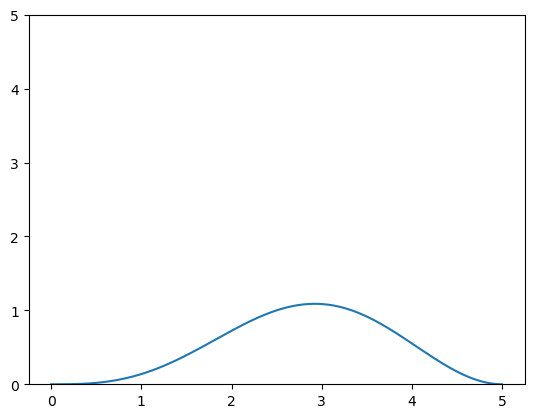

In [10]:
#PLOTTING OF INTEGRAND OF EXPECTATION 
func_np = sp.lambdify('x,n,L', expression, 'numpy')
n=1
L=5
x = np.linspace(0, L, 2000)
plt.ylim(0,5)
plt.plot(x,func_np(x,n,L))

In [11]:
#AN EXAMPLE TO OBTAIN EXPECTATION VALUE 
from scipy.integrate import quad
def integrand(x):
    return func_np(x,n,L)
integral, integral_error= quad(integrand, 0, L)
print('FOR n=1 eigenstate,\nAverage position of the particle=%f \nError=%f\n'%(integral,integral_error))

FOR n=1 eigenstate,
Average position of the particle=2.500000 
Error=0.000000



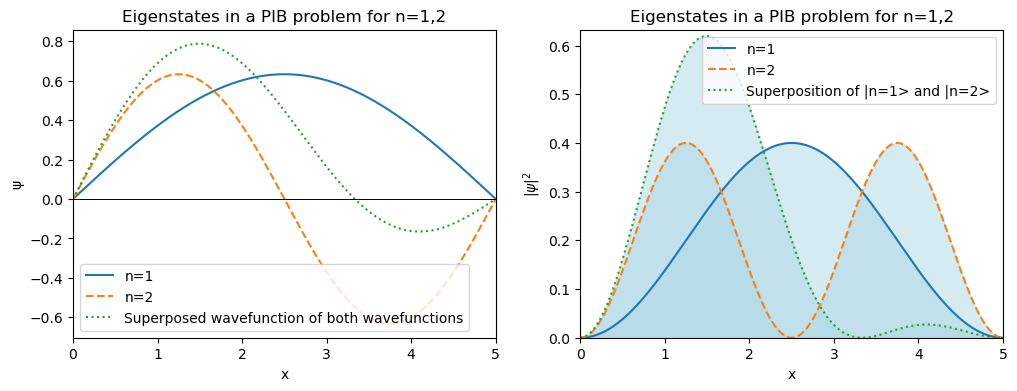

In [12]:
# SUPERPOSED WAVEFUNCTION AND ITS CORRESPONDING PROBABILITY DENSITY PLOT

fig, axes = plt.subplots(1,2,figsize=(12,4))
#FOR WAVEFUNCTION PLOT
ax1=axes[0]
Superposed=0
for n in [1, 2]:
    x = np.linspace(0, L, 2000)
    y = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
    Superposed+=(1/np.sqrt(2))*y
    ax1.plot(x, y, '-' if n == 1 else '--', label='n=1' if n == 1 else 'n=2')
ax1.plot(x,Superposed, ':', label='Superposed wavefunction of both wavefunctions')
ax1.axhline(y=0, color='black', linewidth=0.7)  # Adding the x-axis line
ax1.set_xlim(0, max(x))
ax1.set_xlabel('x')
ax1.set_ylabel('\u03C8')
ax1.set_title('Eigenstates in a PIB problem for n=1,2')
ax1.legend()

#FOR PROBABILITY DENSITY PLOT
ax2=axes[1]
for n in [1, 2]:
    y = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
    ax2.plot(x, y**2, '-' if n == 1 else '--', label='n=1' if n == 1 else 'n=2')
    ax2.fill_between(x, y**2, color='lightblue', alpha=0.5)
ax2.plot(x,Superposed**2, ':', label='Superposition of |n=1> and |n=2>')
ax2.fill_between(x, Superposed**2, color='lightblue', alpha=0.5)
#ax2.axhline(y=0, color='black', linewidth=0.7)  # Adding the x-axis line
ax2.set_ylim(0, max(y))
ax2.set_xlim(0, max(x))
ax2.set_xlabel('x')
ax2.set_ylabel(r'$|\psi|^2$')
ax2.set_title('Eigenstates in a PIB problem for n=1,2')
ax2.legend()

#PLOT PRINTING
plt.show()

**2D-PIB PROBLEM**

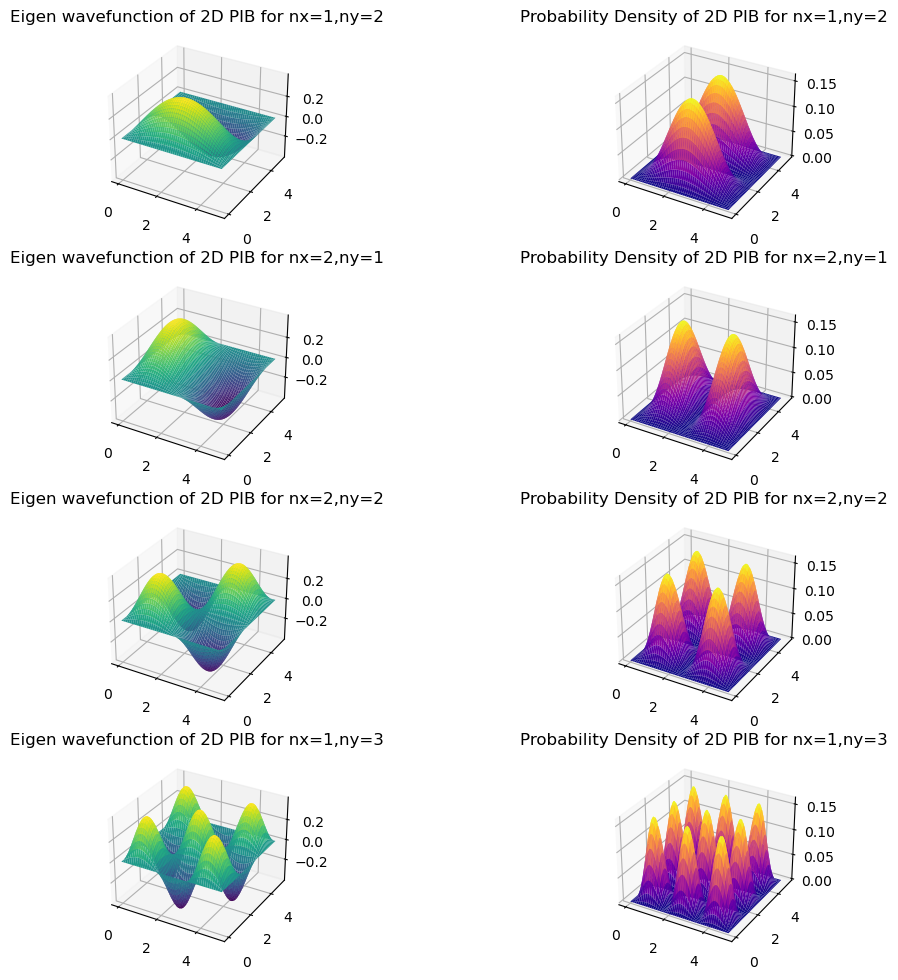

In [13]:
x,y,n,nx,ny,Lx,Ly=sp.symbols('x y n nx ny Lx Ly', real=True)
psi=(sp.sqrt(2/L) * sp.sin(n * sp.pi * x / L))
psiX = psi.subs({n:nx,L:Lx})
psiY= psi.subs({x:y,n:ny,L:Ly})
psi2DPIB = sp.lambdify('x,y,nx,ny,Lx,Ly', psiX * psiY, 'numpy')
fig, axs= plt.subplots(4,2, figsize= (12,12),subplot_kw={"projection": "3d"})
Lx=5
Ly=5
x= np.linspace(0,Lx,1000)
y=np.linspace(0,Ly,1000)
x,y = np.meshgrid(x,y)

nx=1
ny=2
z=psi2DPIB(x,y,nx,ny,Lx,Ly)
axs[0, 0].plot_surface(x, y,psi2DPIB(x,y,nx,ny,Lx,Ly), cmap='viridis')
pdf2DPIB = lambda x,y,nx,ny,Lx,Ly: psi2DPIB(x,y,nx,ny,Lx,Ly)*np.conjugate(psi2DPIB(x,y,nx,ny,Lx,Ly))
axs[0,1].plot_surface(x,y,pdf2DPIB(x,y,nx,ny,Lx,Ly), cmap='plasma' )
axs[0,0].set_title('Eigen wavefunction of 2D PIB for nx=1,ny=2')
axs[0,1].set_title('Probability Density of 2D PIB for nx=1,ny=2')

nx=2
ny=1
z=psi2DPIB(x,y,nx,ny,Lx,Ly)
axs[1,0].plot_surface(x, y,z, cmap='viridis')
axs[1,1].plot_surface(x,y,pdf2DPIB(x,y,nx,ny,Lx,Ly), cmap='plasma' )
axs[1,0].set_title('Eigen wavefunction of 2D PIB for nx=2,ny=1')
axs[1,1].set_title('Probability Density of 2D PIB for nx=2,ny=1')

nx=2
ny=2
z=psi2DPIB(x,y,nx,ny,Lx,Ly)
axs[2,0].plot_surface(x, y,z, cmap='viridis')
axs[2,1].plot_surface(x,y,pdf2DPIB(x,y,nx,ny,Lx,Ly), cmap='plasma' )
axs[2,0].set_title('Eigen wavefunction of 2D PIB for nx=2,ny=2')
axs[2,1].set_title('Probability Density of 2D PIB for nx=2,ny=2')

nx=3
ny=3
z=psi2DPIB(x,y,nx,ny,Lx,Ly)
axs[3,0].plot_surface(x, y,z, cmap='viridis')
axs[3,1].plot_surface(x,y,pdf2DPIB(x,y,nx,ny,Lx,Ly), cmap='plasma' )
axs[3,0].set_title('Eigen wavefunction of 2D PIB for nx=1,ny=3')
axs[3,1].set_title('Probability Density of 2D PIB for nx=1,ny=3')

plt.show()



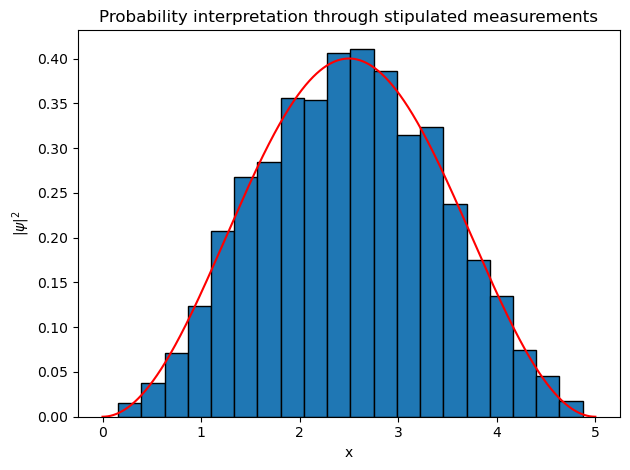

In [14]:
#Probability interpretation through stipulated measurements
accepted_points = []
x,n,L=sp.symbols('x n L', real=True)
psi1D= sp.sqrt(2/L) * sp.sin(n * sp.pi * x / L)
psiSquared1D = sp.lambdify('x,n,L', psi1D**2, 'numpy')
L=5
for i in range(10000):
    xval = np.random.uniform(0,L)
    if psiSquared1D(xval,1,L)>= np.random.uniform(0,0.5):
        accepted_points.append(xval)
hist,bin_edges= np.histogram(accepted_points, 20)
sum_hist = np.sum(hist)
bin_widths = bin_edges[1] - bin_edges[0]
normalized_hist = hist / sum_hist
pdf = normalized_hist / bin_widths
plt.bar(bin_edges[:-1], pdf, width=bin_widths,align='edge',edgecolor='black')
plt.plot(np.linspace(0,L,2000),psiSquared1D(np.linspace(0,L,2000),1,L),color='red')
plt.title('Probability interpretation through stipulated measurements')
plt.xlabel('x')
plt.ylabel(r'$|\psi|^2$')
plt.tight_layout()
plt.show()


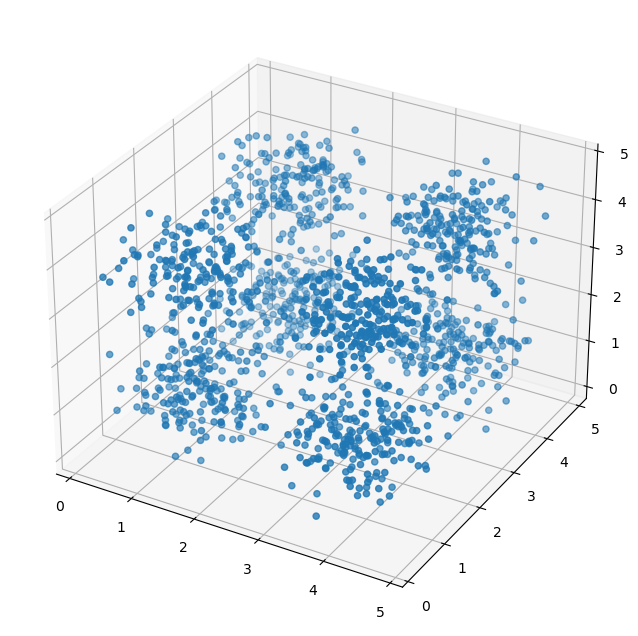

In [15]:
#Probability cloud visualisation
x,y,z,n,nx,ny,nz,Lx,Ly,Lz=sp.symbols('x y z n nx ny nz Lx Ly Lz', real=True)
psi=(sp.sqrt(2/L) * sp.sin(n * sp.pi * x / L))
psiX = psi.subs({n:nx,L:Lx})
psiY= psi.subs({x:y,n:ny,L:Ly})
psiZ= psi.subs({x:z,n:ny,L:Ly})
psi3DPIB = sp.lambdify('x,y,z,nx,ny,nz,Lx,Ly,Lz', psiX * psiY * psiZ, 'numpy')
psiSquared3D = sp.lambdify('x,y,z,nx,ny,nz,Lx,Ly,Lz',psiX * psiY * psiZ*np.conjugate(psiX * psiY * psiZ), 'numpy')
fig, axs= plt.subplots(1,1, figsize= (8,8),subplot_kw={"projection": "3d"})
Lx=5
Ly=5
Lz=5
accepted_xpoints=[]
accepted_ypoints=[]
accepted_zpoints=[]
for i in range(100000):
    xval = np.random.uniform(0,Lx)
    yval= np.random.uniform(0,Ly)
    zval= np.random.uniform(0,Lz)
    if psiSquared3D(xval,yval,zval,2,2,2,L,L,L)>= np.random.uniform(0,0.5):
        accepted_xpoints.append(xval)
        accepted_ypoints.append(yval)
        accepted_zpoints.append(zval)
axs.scatter(accepted_xpoints,accepted_ypoints,accepted_zpoints)
plt.show()




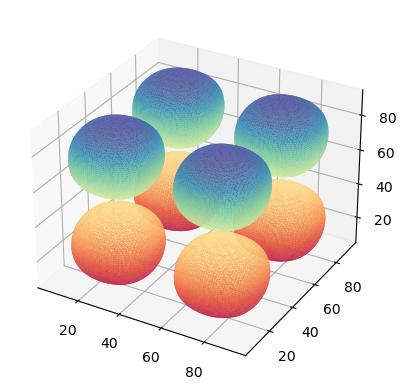

In [20]:
#Isocontour surface visualization
from mpl_toolkits.mplot3d import Axes3D
from skimage import measure

x, y, z, n, nx, ny, nz, Lx, Ly, Lz = sp.symbols('x y z n nx ny nz Lx Ly Lz', real=True)
psi = (sp.sqrt(2 / L) * sp.sin(n * sp.pi * x / L))
psiX = psi.subs({n: nx, L: Lx})
psiY = psi.subs({x: y, n: ny, L: Ly})
psiZ = psi.subs({x: z, n: nz, L: Lz})
psi3DPIB = sp.lambdify('x,y,z,nx,ny,nz,Lx,Ly,Lz', psiX * psiY * psiZ, 'numpy')
psiSquared3D = sp.lambdify('x,y,z,nx,ny,nz,Lx,Ly,Lz', psiX * psiY * psiZ * np.conjugate(psiX * psiY * psiZ), 'numpy')

Lx = 5
Ly = 5
Lz = 5
x, y, z = np.mgrid[0:Lx:100j, 0:Ly:100j, 0:Lz:100j]
iso_val = 0.01
nx = ny = nz = 2
data = psiSquared3D(x, y, z, nx, ny, nz, Lx, Ly, Lz)
verts, faces, _, _ = measure.marching_cubes(data, iso_val)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], cmap='Spectral', lw=1)
plt.show()


In [17]:
#TIME DEPENDENCY OF PDF OF 1D PIB
import ipywidgets as widgets
from IPython.display import display, clear_output

L=5
hbar=m=1
def energy1DPIB(n,L):
    return ((hbar*n*np.pi/L)**2)/(2*m)
def plot_function(t):
    Superposed=0
    for n in [1, 2]:
        x = np.linspace(0, L, 2000)
        y = np.sqrt(2/L) * np.sin(n * np.pi * x / L)*np.exp(-(1j)*t*energy1DPIB(n,L)/hbar)
        Superposed+=(1/np.sqrt(2))*y
    for n in [1, 2]:
        y = np.sqrt(2/L) * np.sin(n * np.pi * x / L)*np.exp(-(1j)*t*energy1DPIB(n,L)/hbar)
        plt.plot(x, y*np.conjugate(y), '-' if n == 1 else '--', label='n=1' if n == 1 else 'n=2')
        plt.fill_between(x, y*np.conjugate(y), color='lightblue', alpha=0.5)
    plt.plot(x,Superposed*np.conjugate(Superposed), ':', label='Superposition of |n=1> and |n=2>')
    plt.fill_between(x, Superposed**2, color='lightblue', alpha=0.5)
    plt.ylim(0, max(y))
    plt.xlim(0, max(x))
    plt.xlabel('x')
    plt.ylabel(r'$|\psi|^2$')
    plt.title('Eigenstates in a PIB problem for n=1,2')
    plt.legend()
    plt.show()

# Define the range and initial value for the slider
t_min = 0.0
t_max = 100.0
t_step = 0.5
t_initial= 0.0

# Create the slider widget
slider = widgets.FloatSlider(
    value=t_initial,
    min=t_min,
    max=t_max,
    step=t_step,
    description='TIME in seconds:',
    continuous_update=True
)

# Display the interactive plot using interactive_output
interactive_plot = widgets.interactive_output(plot_function, {'t': slider})
display(widgets.VBox([slider, interactive_plot]))

